In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdf = gpd.read_file('./output/shapes/LAI_ADS_DEM.shp')
gdf.dropna(inplace=True)
gdf.head()

,aoi,2000_mean,2001_mean,2002_mean,2003_mean,2004_mean,2005_mean,2006_mean,2007_mean,2008_mean,...,ACRES,SURVEY_YEA,id,Ele_mean,Ele_median,Slo_mean,Slo_median,Asp_mean,Asp_median,geometry
1,2,1.331579,1.326316,1.252632,1.410526,1.231579,1.336842,1.347368,1.252632,1.273684,...,1164.45,2022,2,2018.875406,2035.0,16.172090,15.740141,199.578002,208.360596,"POLYGON ((383441.909 3917343.585, 383252.815 3..."
3,4,1.200000,1.100000,1.100000,1.100000,1.000000,1.100000,1.100000,1.100000,1.100000,...,96.83,2019,4,2957.645455,2958.0,6.595483,6.862571,171.054967,165.192451,"POLYGON ((338164.684 4097824.758, 338195.316 4..."
5,6,2.419697,2.468182,2.375758,2.186364,2.074242,2.263636,2.162121,2.201515,2.190909,...,3929.43,2019,6,2142.085527,2122.0,22.870401,23.044903,263.617014,292.546051,"POLYGON ((351907.441 4035912.257, 351962.681 4..."
6,7,1.600000,1.833333,1.833333,1.733333,1.750000,1.800000,1.650000,1.800000,1.750000,...,389.75,2017,7,2231.637813,2254.5,15.065561,14.689551,191.526234,191.502174,"POLYGON ((337757.005 4054544.906, 337749.410 4..."
7,8,0.666667,0.716667,0.766667,0.716667,0.716667,0.716667,0.650000,0.766667,0.733333,...,347.50,2022,8,3006.552564,2990.0,17.629920,16.276206,176.500613,180.000000,"POLYGON ((312036.550 4171978.810, 312040.896 4..."


In [3]:
gdf.columns

Index(['aoi', '2000_mean', '2001_mean', '2002_mean', '2003_mean', '2004_mean',
       '2005_mean', '2006_mean', '2007_mean', '2008_mean', '2009_mean',
       '2010_mean', '2011_mean', '2012_mean', '2013_mean', '2014_mean',
       '2015_mean', '2016_mean', '2017_mean', '2018_mean', '2019_mean',
       '2020_mean', '2021_mean', '2022_mean', '2023_mean', '2000_media',
       '2001_media', '2002_media', '2003_media', '2004_media', '2005_media',
       '2006_media', '2007_media', '2008_media', '2009_media', '2010_media',
       '2011_media', '2012_media', '2013_media', '2014_media', '2015_media',
       '2016_media', '2017_media', '2018_media', '2019_media', '2020_media',
       '2021_media', '2022_media', '2023_media', 'OBJECTID', 'HOST_CODE',
       'HOST', 'DCA_CODE', 'DCA_COMMON', 'DAMAGE_TYP', 'DAMAGE_T_1',
       'PERCENT_AF', 'PERCENT__1', 'ACRES', 'SURVEY_YEA', 'id', 'Ele_mean',
       'Ele_median', 'Slo_mean', 'Slo_median', 'Asp_mean', 'Asp_median',
       'geometry'],
      dtype=

In [4]:
gdf['PERCENT_AF'].unique()

array([2., 3., 4., 5., 1.])

In [5]:
# LAI data
ind_array = np.arange(1,13).tolist()
ind_array2 = np.arange(18,25).tolist()
during_array = np.arange(13,18).tolist()



In [8]:
ind_array

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [9]:
# adding a predrought mean 
# select mean coloumns
mean_cols = gdf.iloc[:,ind_array]
post_mean_cols = gdf.iloc[:, ind_array2]
during_mean_cols = gdf.iloc[:, during_array]
# predrought mean
pre_mean = mean_cols.mean(axis=1)
post_mean = post_mean_cols.mean(axis=1)
during_mean = during_mean_cols.mean(axis=1)

gdf['pre_mean'] = pre_mean
gdf['post_mean'] = post_mean
gdf['during_mean'] = during_mean

# loading a data to df
df1 = gdf[['PERCENT_AF','PERCENT__1',
           'Ele_mean','Ele_median', 'Slo_mean', 'Slo_median', 'Asp_mean', 'Asp_median',
       'pre_mean', 'during_mean', 'post_mean']]
df1

,PERCENT_AF,PERCENT__1,Ele_mean,Ele_median,Slo_mean,Slo_median,Asp_mean,Asp_median,pre_mean,during_mean,post_mean
1,2.0,Light (4-10%),2018.875406,2035.0,16.172090,15.740141,199.578002,208.360596,1.310088,1.124211,1.218045
3,2.0,Light (4-10%),2957.645455,2958.0,6.595483,6.862571,171.054967,165.192451,1.091667,1.100000,1.028571
5,2.0,Light (4-10%),2142.085527,2122.0,22.870401,23.044903,263.617014,292.546051,2.271717,2.123636,1.986147
6,3.0,Moderate (11-29%),2231.637813,2254.5,15.065561,14.689551,191.526234,191.502174,1.700000,1.523333,1.433333
7,3.0,Moderate (11-29%),3006.552564,2990.0,17.629920,16.276206,176.500613,180.000000,0.704167,0.760000,0.626190
...,...,...,...,...,...,...,...,...,...,...,...
295,2.0,Light (4-10%),2203.719298,2205.0,15.583436,16.281376,267.474237,275.427307,3.133333,2.900000,2.142857
296,5.0,Very Severe (>50%),2199.721893,2201.0,16.418350,16.231863,291.281715,294.505493,2.433333,2.020000,1.514286
297,3.0,Moderate (11-29%),2472.427986,2458.0,12.746053,11.576514,141.993136,113.945587,1.564474,1.343158,1.395489
298,3.0,Moderate (11-29%),2638.099788,2640.0,10.946732,9.324802,162.766030,151.593491,1.179762,1.191429,0.891837


In [7]:

# save the mean dataframe to csv (pre, during, post mean values)
df1.to_csv('./output/LAI_DEM_data.csv')


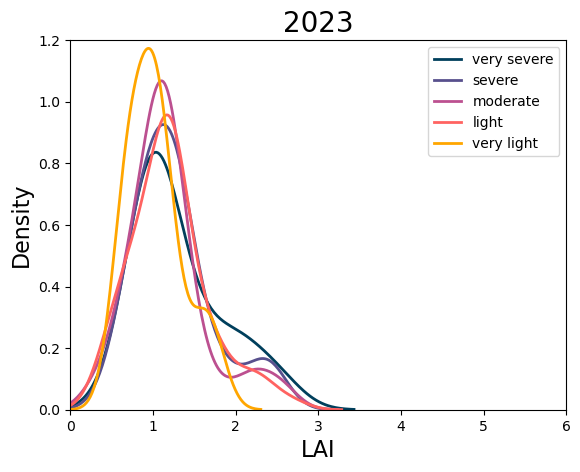

In [56]:
year = 2023
val = (f'{year}_mean')
#year = "Before drought LAI"
#val = 'pre_mean'

# create 2017 severe array
vs_df = gdf[gdf['PERCENT_AF'].isin([5])]
vs_lai = vs_df[val].tolist()
vs_array = np.array(vs_lai)


# severe
s_df = gdf[gdf['PERCENT_AF'].isin([4])]
s_lai = s_df[val].tolist()
s_array = np.array(s_lai)

m_df = gdf[gdf['PERCENT_AF'].isin([3])]
m_lai = m_df[val].tolist()
m_array = np.array(m_lai)


l_df = gdf[gdf['PERCENT_AF'].isin([2])]
l_lai = l_df[val].tolist()
l_array = np.array(l_lai)

vl_df = gdf[gdf['PERCENT_AF'].isin([1])]
vl_lai = vl_df[val].tolist()
vl_array = np.array(vl_lai)

# Plot only KDE curves for all arrays on the same plot
sns.kdeplot(vs_array, color='#003f5c', label='very severe', linewidth=2)
sns.kdeplot(s_array, color='#58508d', label='severe', linewidth=2)
sns.kdeplot(m_array, color='#bc5090', label='moderate', linewidth=2)
sns.kdeplot(l_array, color='#ff6361', label='light', linewidth=2)
sns.kdeplot(vl_array, color='#ffa600', label='very light', linewidth=2)

plt.xlim(0, 6)
plt.ylim(0, 1.2)
plt.xlabel("LAI", fontsize=16)
plt.ylabel("Density", fontsize=16)
# Add legend
plt.legend()
plt.title(f'{year}', fontsize=20)

# savefig
plt.savefig(f"./plots/{year}_density_plot.png")
# Show plot
plt.show()

In [96]:
import PIL
import imageio
import glob

In [99]:
png_list = glob.glob("./plots/*.png")

# Custom key function to extract the year from the file name
def extract_year(filename):
    return int(filename.split('/')[-1].split('_')[0])

# Sort the list of file paths based on the year
sorted_png_list = sorted(png_list, key=extract_year)
sorted_png_list

['./plots/2000_density_plot.png',
 './plots/2001_density_plot.png',
 './plots/2002_density_plot.png',
 './plots/2003_density_plot.png',
 './plots/2004_density_plot.png',
 './plots/2005_density_plot.png',
 './plots/2006_density_plot.png',
 './plots/2007_density_plot.png',
 './plots/2008_density_plot.png',
 './plots/2009_density_plot.png',
 './plots/2010_density_plot.png',
 './plots/2011_density_plot.png',
 './plots/2012_density_plot.png',
 './plots/2013_density_plot.png',
 './plots/2014_density_plot.png',
 './plots/2015_density_plot.png',
 './plots/2016_density_plot.png',
 './plots/2017_density_plot.png',
 './plots/2018_density_plot.png',
 './plots/2019_density_plot.png',
 './plots/2020_density_plot.png',
 './plots/2021_density_plot.png',
 './plots/2022_density_plot.png',
 './plots/2023_density_plot.png']

In [102]:
# empty image array declaration
gif_list= []

# append the array with each image
for png_files in sorted_png_list:
    gif_list.append(imageio.imread(png_files))

# change the speed adjesting the duration
imageio.mimwrite("./plots/density_animation.gif", gif_list, duration=0.8, loop=0)

/var/folders/9w/rppzs1k90gl9c6c9ndw00qfc0000gr/T/ipykernel_13185/1711252966.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gif_list.append(imageio.imread(png_files))
